In [1]:
#x = {'sigma_psi': 0.25,'sigma_psi_init': 2.332155241562433,'pmeet_21': 0.30325973411684065,'pmeet_28': 0.7329390078838265,'pmeet_35': 1.0,'preg_21': 0.017160684393485684,'preg_28': 0.03733205098574577,'preg_35': -0.0014982571526763744,'u_shift_mar': 1.1123578939396237,'util_alp': 0.3061592839066737,'util_kap': 0.8512902458486851,'util_qbar': 1.1171096340029305,'disutil_marry_sm_mal': 64.12382814306783,'disutil_shotgun': 5.78268701428576,'abortion_costs': 30.926325607734366,'p_abortion_access': 0.9916006844636375,'u_lost_divorce': 6.555383565811324}
#from estimates import get_point
#x, targ_mode = get_point(True,read_wisdom=True)

In [2]:
#from model import Model
#mdl = Model(verbose=True,**x)
#mdl_list = [mdl]
#mdl_list[0].time_statistics()

In [3]:
from importlib import reload
#import simulations
#import numpy as np
#reload(simulations)
#Agents = simulations.Agents
#np.random.seed(18)
#agents = Agents( mdl_list, verbose=True, fix_seed=False)
#moments_list = [agents.compute_moments()]
#mom = {key : np.mean([m[key] for m in moments_list]) for key in moments_list[0].keys()}



In [4]:
#from targets import target_values
#from residuals import distance_to_targets
#tar = target_values()
#resid_all, resid_sc, dist = distance_to_targets(mom,tar,weights={},
#                                                    report=True)
#print('Distance is {}'.format(dist))

In [5]:
#mdl_list[0].time_statistics()

Hi!
Hi!
using cupy!
{'sigma_psi': 0.34153654077955026, 'sigma_psi_init': 0.9625285709046334, 'pmeet_21': 0.3884346191721485, 'pmeet_30': 0.8255122415606927, 'pmeet_40': 0.5902175358773889, 'preg_21': -0.002105151337107869, 'preg_28': 0.01816639051057771, 'preg_35': -0.055116087709172444, 'u_shift_mar': 0.32601792130294693, 'util_alp': 0.6363391142973963, 'util_kap': 0.5170708601161584, 'util_qbar': 21.22311064686936, 'disutil_marry_sm_mal': 7.514318875563523, 'disutil_shotgun': 8.54256490705729, 'abortion_costs': 8.697636754266542, 'p_abortion_access': 0.3772134220728484, 'u_lost_divorce': 9.640697649555198, 'mu_psi_init': -1.1226049903883477, 'high education': True}
Creation of setup took 1.79, total 1.79, mem 0.89G
solving for t = 54
solving for t = 53
solving for t = 52
solving for t = 51
solving for t = 50
solving for t = 49
solving for t = 48
solving for t = 47
solving for t = 46
solving for t = 45
solving for t = 44
solving for t = 43
Integration (c) took 0.96, total 4.78, mem 0.

/projects/p30190/py_shotgun/simulations.py:549: RuntimeWarning: invalid value encountered in long_scalars
  self.share_aborted[t] = 100*n_abortions / (n_abortions + n_kept)


for sname = Female, single: 0 mar, 820 coh,  5022 disagreed, 8882 did not meet (14724 total)
At t = 1 count of Female and child is 276
for sname = Female and child: 4 mar, 0 coh,  109 disagreed, 163 did not meet (276 total)
Simulations, iteration took 0.65, total 32.8, mem 2.94G
At t = 1 for Female and child 272 have LS of 1.0
At t = 1 for Couple, no children 820 have LS of 1.0
At t = 1 for Couple and child 4 have LS of 1.0
At t = 2 count of Female, single is 13904
5 abortions done at t = 1 for Female, single
12 abortions refused at t = 1 for Female, single
for sname = Female, single: 22 mar, 840 coh,  5962 disagreed, 7080 did not meet (13904 total)
At t = 2 count of Female and child is 272
for sname = Female and child: 8 mar, 0 coh,  136 disagreed, 128 did not meet (272 total)
At t = 2 count of Couple, no children is 820
At t = 2 count of Couple and child is 4
Simulations, iteration took 0.61, total 33.41, mem 2.94G
At t = 2 for Female and child 294 have LS of 1.0
At t = 2 for Couple,

for sname = Female, single: 0 mar, 382 coh,  1229 disagreed, 1157 did not meet (2768 total)
At t = 15 count of Female and child is 846
for sname = Female and child: 57 mar, 0 coh,  438 disagreed, 351 did not meet (846 total)
At t = 15 count of Couple, no children is 3042
At t = 15 count of Couple and child is 8344
At t = 15 for Female and child 849 have LS of 1.0
At t = 15 for Couple, no children 2835 have LS of 1.0
At t = 15 for Couple and child 8904 have LS of 1.0
At t = 16 count of Female, single is 2412
for sname = Female, single: 0 mar, 282 coh,  892 disagreed, 1238 did not meet (2412 total)
At t = 16 count of Female and child is 849
for sname = Female and child: 33 mar, 0 coh,  403 disagreed, 413 did not meet (849 total)
At t = 16 count of Couple, no children is 2835
At t = 16 count of Couple and child is 8904
At t = 16 for Female and child 885 have LS of 1.0
At t = 16 for Couple, no children 2634 have LS of 1.0
At t = 16 for Couple and child 9336 have LS of 1.0
At t = 17 count o

divorced if k then m and one marriage: base 0.11133367139959433, compare 0.1480121
divorced by years after marriage if kids first, 10: base 0.1736216613575104, compare 0.20118
divorced if m then k and one marriage: base 0.03771857138001807, compare 0.0536316
divorced by years after marriage if marriage first, 10: base 0.05229066724866779, compare 0.0602147


/projects/p30190/py_shotgun/fit_plot.py:252: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[0,0])


('KF', array([0.02502171, 0.04283619, 0.06184383, 0.08057789, 0.1009329 ,
       0.11169198, 0.12566831, 0.14174356, 0.15589778, 0.17362166]))
('MF', array([0.        , 0.00808692, 0.01355644, 0.01943164, 0.02692212,
       0.03259678, 0.03851089, 0.0447624 , 0.04996453, 0.05229067]))
failed to plot single moms (new)
failed to plot welfare
failed to plot ref


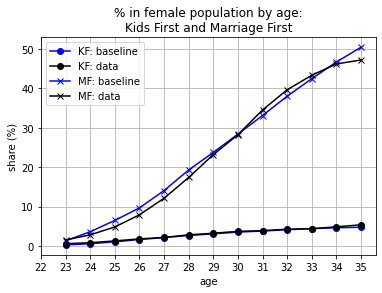

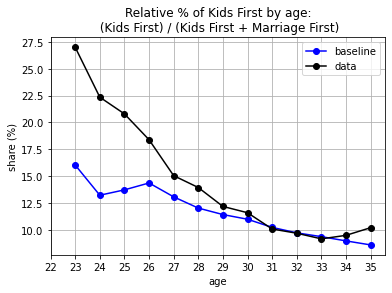

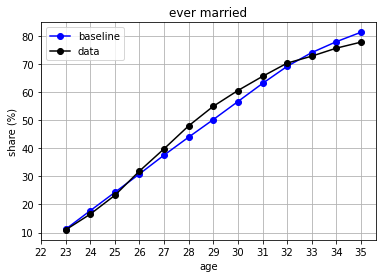

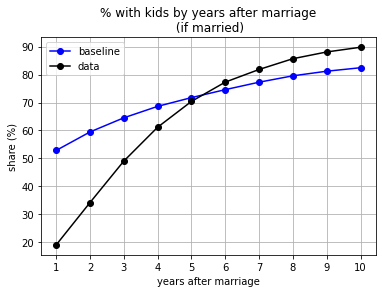

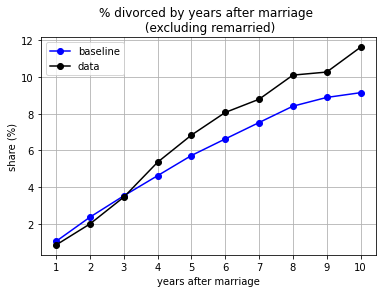

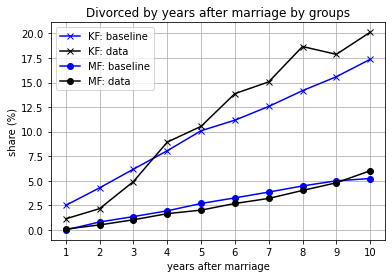

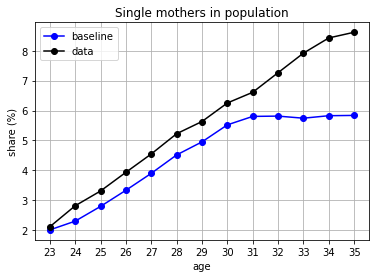

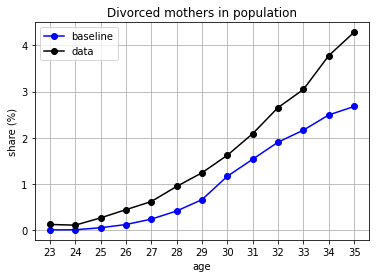

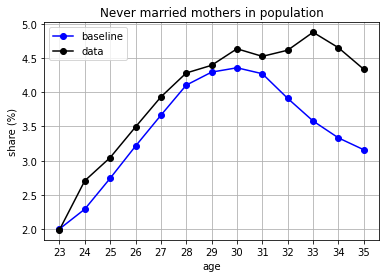

(7, 15)
(7, 15)
(7, 1, 3, 5)
(50, 7, 5, 15, 1)
(50, 7, 5, 15, 11)
(7, 1, 3, 5)
(50, 7, 5, 15, 1)
(50, 7, 5, 15, 11)


{'read_wisdom': False,
 'erase': False,
 'high_e': True,
 'x': {'sigma_psi': 0.34153654077955026,
  'sigma_psi_init': 0.9625285709046334,
  'pmeet_21': 0.3884346191721485,
  'pmeet_30': 0.8255122415606927,
  'pmeet_40': 0.5902175358773889,
  'preg_21': -0.002105151337107869,
  'preg_28': 0.01816639051057771,
  'preg_35': -0.055116087709172444,
  'u_shift_mar': 0.32601792130294693,
  'util_alp': 0.6363391142973963,
  'util_kap': 0.5170708601161584,
  'util_qbar': 21.22311064686936,
  'disutil_marry_sm_mal': 7.514318875563523,
  'disutil_shotgun': 8.54256490705729,
  'abortion_costs': 8.697636754266542,
  'p_abortion_access': 0.3772134220728484,
  'u_lost_divorce': 9.640697649555198,
  'mu_psi_init': -1.1226049903883477,
  'high education': True},
 'targ_mode': 'high education',
 'tar': {'ever kids by years after marriage, 4': (0.6114712, 0.0023096),
  'ever kids by years after marriage, 5': (0.7039068, 0.0021802),
  'ever kids by years after marriage, 6': (0.7730147, 0.0020489),
  'ever

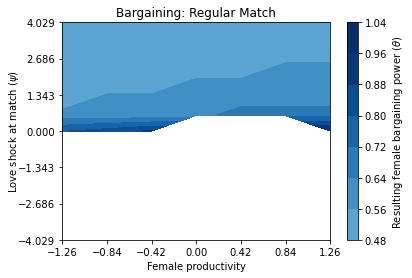

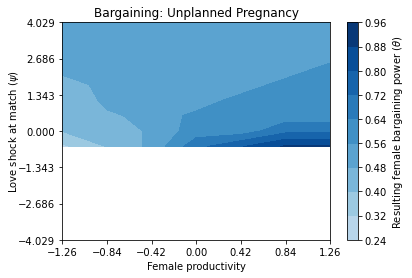

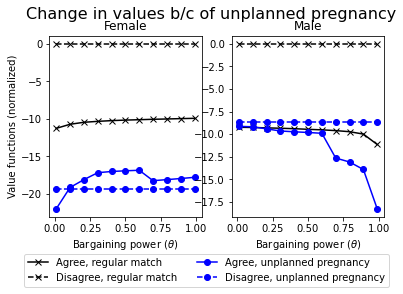

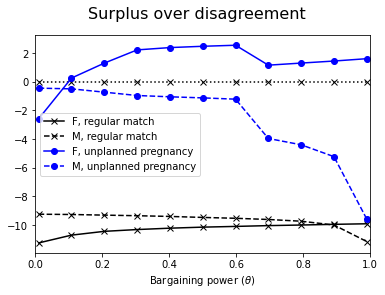

In [6]:
import main_onerun
reload(main_onerun)
main = main_onerun.main

outs = main(read_wisdom=False,erase=False)